# The Avocado Project

**Prepared for FLIP ROBO by Olumide Ikumapayi-DS2306**

# About The Avocado Dataset

The Avocado project data was obtained from the Hass Avocado Board website in May 2018 and consolidated into a single CSV file. The data table consists of weekly retail scan data for the year 2018, specifically focusing on the national retail volume (in units) and price of avocados. This retail scan data is collected directly from cash registers of retailers and represents actual sales of Hass avocados. From 2013 onwards, the table also includes an expanded dataset that encompasses various retail channels such as grocery, mass, club, drug, dollar, and military outlets. The Average Price column in the table represents the cost per unit (per avocado), even when avocados are sold in bags containing multiple units. The Product Lookup codes (PLU's) listed in the table exclusively pertain to Hass avocados, while other avocado varieties like greenskins are not included in this dataset.

Please check the following link for more information regarding the dataset:https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip.

The flow of this machine learning exercise is as follows:

1. [Import Necessary Libraries](#Import-Necessary-Libraries)
2. [Importing the Avocado Dataset](#Importing-the-Avocado-Dataset)
3. [Exploratory Data Analysis(EDA)](#Exploratory-Data-Analysis-(EDA))
4. [Data Visualization](#Data-Visualization)
5. [Data Preprocessing](#Data-Preprocessing)
6. [The Machine Learning Model Training,Evaluation and Predictions](#The-Machine-Learning-Model-Training,-Evaluation-and-Predictions)

  *  i.  [Random Forest Classifier](#Random-Forest-Classifier)
  *  ii. [Linear Regression](#Linear-Regression)

# Import Necessary Libraries

Importing all necessary libraries for data manipulation, visualization, and machine learning(ML).

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

# Loading the Avocado Dataset

In [101]:
url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv'
df = pd.read_csv(url)

In [102]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [103]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
print(df.dtypes)

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object


In [105]:
df.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [106]:
df.shape

(16468, 14)

In [107]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [108]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [109]:
df.isnull().sum().sum()

209314

<AxesSubplot:>

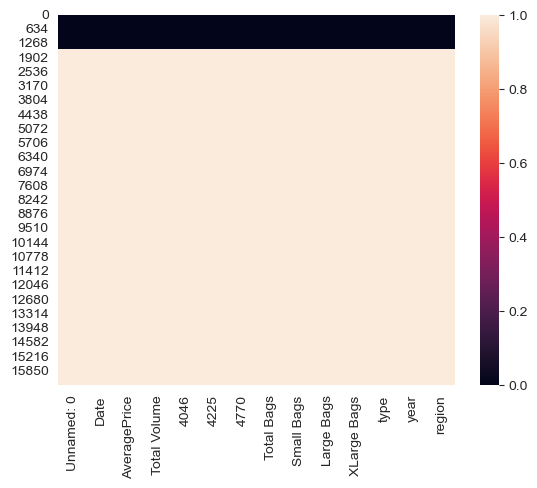

In [110]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [111]:
print(df.isnull().sum())
print(df.shape)

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64
(16468, 14)


In [112]:
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
(1517, 14)


In [113]:
df.shape

(1517, 14)

In [114]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [115]:
df.head(4)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany


In [116]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,14.0,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


**The Avocado Price Prediction**:

Aim of the Project: 

In the Avocado Price Prediction project, we aim to analyze and predict the average price of avocados based on various features. The dataset was obtained from the Hass Avocado Board website in May 2018 and contains weekly retail scan data for National retail volume (units) and price of Hass avocados.This data reflects an expanded, multi-outlet retail data set, including various channels like grocery, mass, club, drug, dollar, and military.

**Features (Independent Variables):**

1. **Date**: The date of the observation, which can be used to track price changes over time.
2. **Type**: Indicates whether the avocados are conventional or organic. This feature may affect avocado prices.
3. **Year**: The year of the observation, which can capture annual price trends.
4. **Region**: The city or region where the avocados were sold. Different regions may have varying price levels due to factors like demand and supply.
5. **Total Volume**: The total number of avocados sold. The volume of avocados sold may influence their price.
6. **PLU 4046**: The total number of avocados with PLU 4046 sold. This is a specific type of avocado that may have its own price dynamics.
7. **PLU 4225**: The total number of avocados with PLU 4225 sold. Like PLU 4046, this represents a specific type of avocado.
8. **PLU 4770**: The total number of avocados with PLU 4770 sold. This is another specific type of avocado.

**Output (Dependent Variable - Target Variable):**

**AveragePrice**: The average price of a single avocado. This is the variable we want to predict in our project. It represents the target variable for both classification and regression tasks.

For the classification task, we will create a binary classification label based on the AveragePrice, e.g., classifying regions as "High Price" or "Low Price."

For the regression task, we will directly predict the numerical value of the AveragePrice using the other features as independent variables.

The project is aimed to build models that can provide insights into the factors influencing avocado prices and make accurate predictions regarding avocado prices in different regions and over time.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


In [118]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [119]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [120]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [121]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [122]:
# CHECK FOR BALANCING AMONG THE FEATURES 

# Check for balancing among the features for 'High Price' class
high_price_data = df[df['AveragePrice'] == 'High Price']
low_price_data = df[df['AveragePrice'] == 'Low Price']

# Display counts for each class
print("Number of samples in 'High Price' class:", len(high_price_data))
print("Number of samples in 'Low Price' class:", len(low_price_data))

# Check for balancing among the features
for column in df.columns:
    if column != 'AveragePrice':
        high_price_counts = high_price_data[column].value_counts(normalize=True)
        low_price_counts = low_price_data[column].value_counts(normalize=True)
        
         # Display feature distribution for each class
        print(f"\nFeature: {column}")
        print("Distribution in 'High Price' class:")
        print(high_price_counts)
        print("\nDistribution in 'Low Price' class:")
        print(low_price_counts)

Number of samples in 'High Price' class: 0
Number of samples in 'Low Price' class: 0

Feature: Date
Distribution in 'High Price' class:
Series([], Name: Date, dtype: float64)

Distribution in 'Low Price' class:
Series([], Name: Date, dtype: float64)

Feature: Total Volume
Distribution in 'High Price' class:
Series([], Name: Total Volume, dtype: float64)

Distribution in 'Low Price' class:
Series([], Name: Total Volume, dtype: float64)

Feature: 4046
Distribution in 'High Price' class:
Series([], Name: 4046, dtype: float64)

Distribution in 'Low Price' class:
Series([], Name: 4046, dtype: float64)

Feature: 4225
Distribution in 'High Price' class:
Series([], Name: 4225, dtype: float64)

Distribution in 'Low Price' class:
Series([], Name: 4225, dtype: float64)

Feature: 4770
Distribution in 'High Price' class:
Series([], Name: 4770, dtype: float64)

Distribution in 'Low Price' class:
Series([], Name: 4770, dtype: float64)

Feature: Total Bags
Distribution in 'High Price' class:
Series([]

In [123]:
# Categorize the target variable into two classes: 'High Price' and 'Low Price'
df['Price_Classification'] = pd.cut(df['AveragePrice'], bins=[-np.inf, 25, np.inf], labels=['Low Price', 'High Price'])

Updated Class Distribution:
 Low Price     782
High Price    735
Name: Price_Classification, dtype: int64


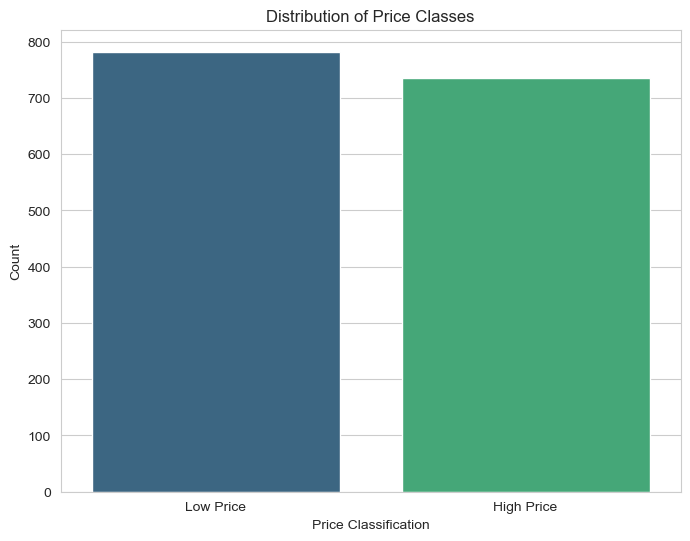

In [124]:
# Categorize 'AveragePrice' into two classes using quantiles
df['Price_Classification'] = pd.qcut(df['AveragePrice'], q=[0, 0.5, 1], labels=['Low Price', 'High Price'])

# Display the updated class distribution
class_distribution = df['Price_Classification'].value_counts()
print("Updated Class Distribution:\n", class_distribution)

# Bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Price_Classification', data=df, palette='viridis')
plt.title('Distribution of Price Classes')
plt.xlabel('Price Classification')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

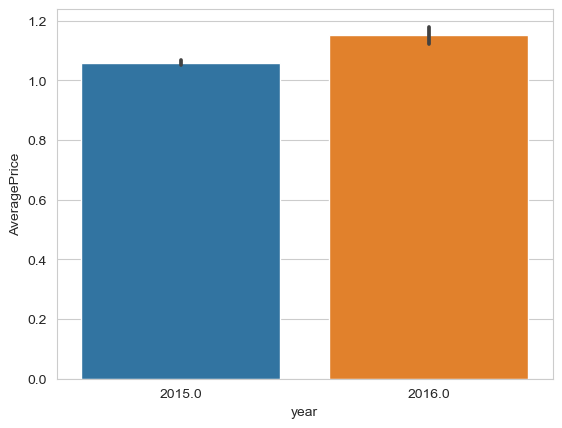

In [125]:
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

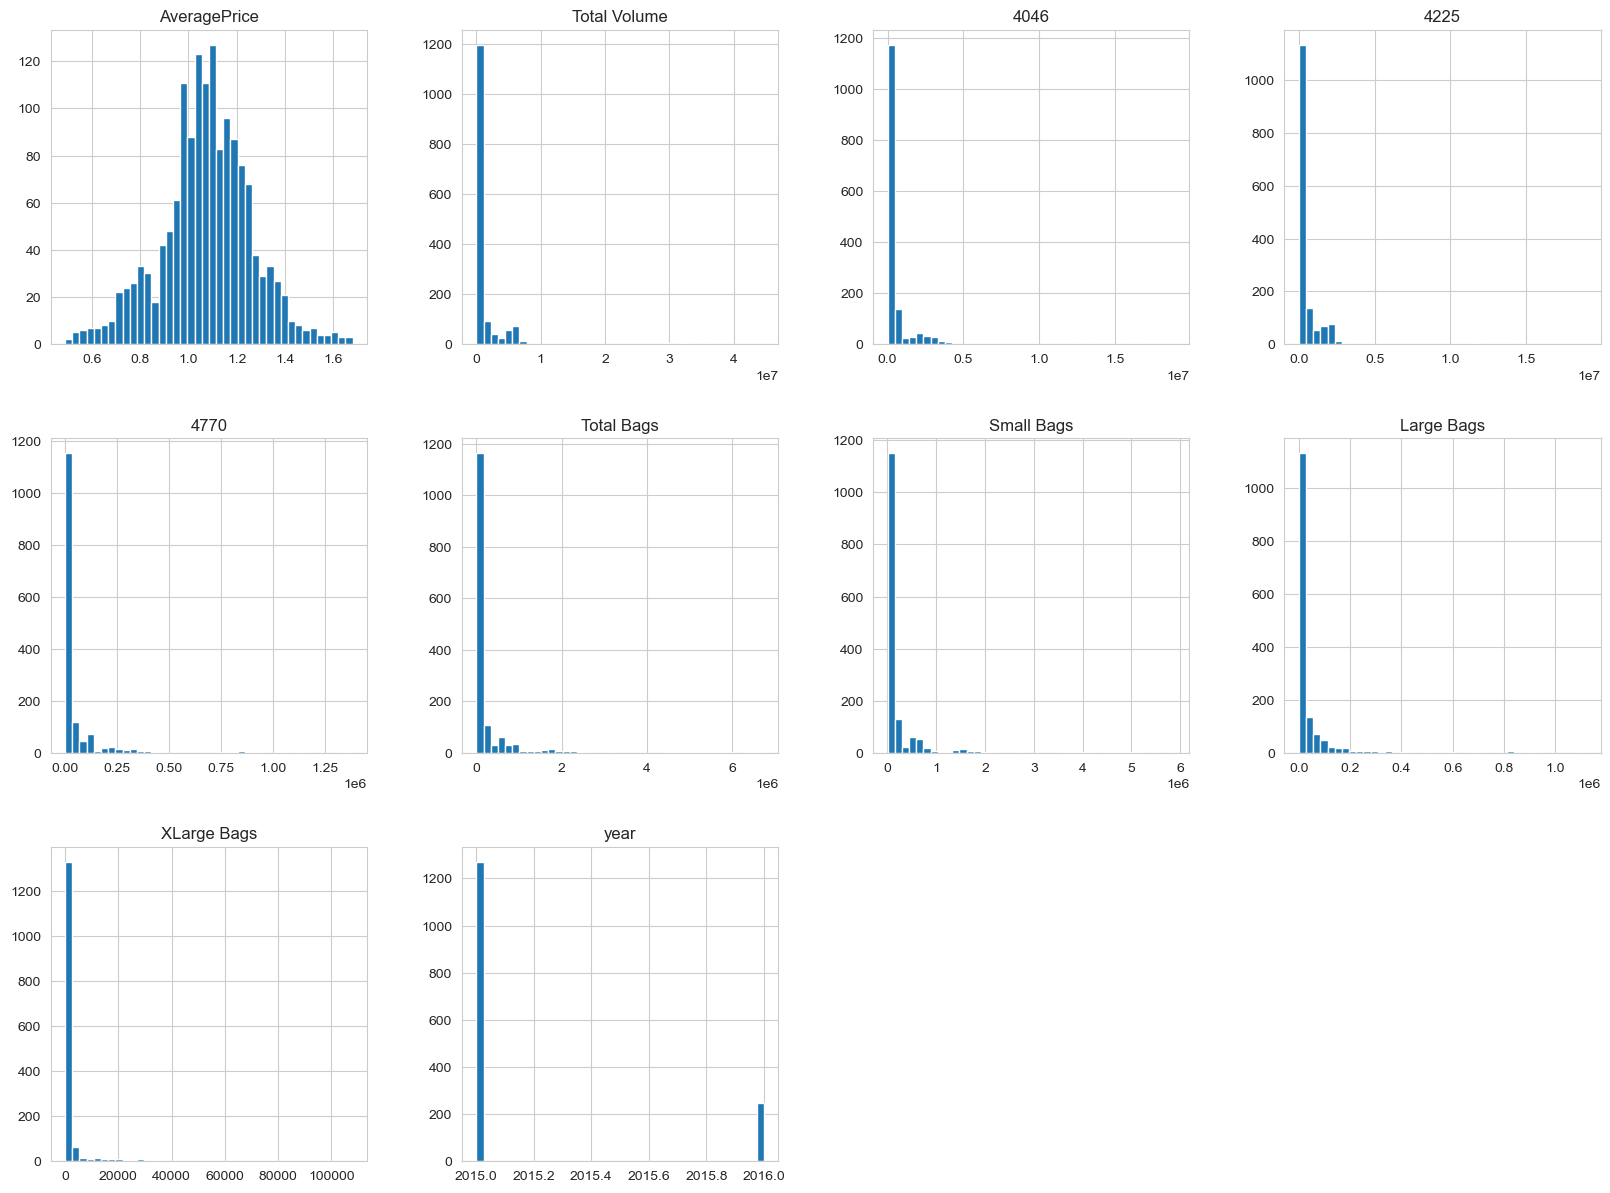

In [126]:
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 40)

<AxesSubplot:>

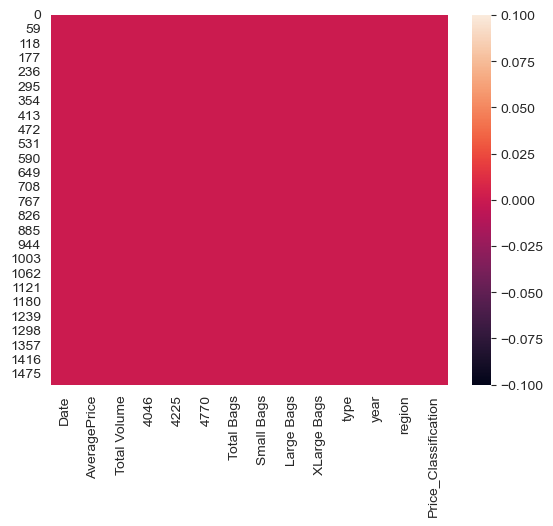

In [127]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [128]:
df.skew()

C:\Users\hp\AppData\Local\Temp\ipykernel_20404\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

AveragePrice       AxesSubplot(0.125,0.653529;0.168478x0.226471)
Total Volume    AxesSubplot(0.327174,0.653529;0.168478x0.226471)
4046            AxesSubplot(0.529348,0.653529;0.168478x0.226471)
4225            AxesSubplot(0.731522,0.653529;0.168478x0.226471)
4770               AxesSubplot(0.125,0.381765;0.168478x0.226471)
Total Bags      AxesSubplot(0.327174,0.381765;0.168478x0.226471)
Small Bags      AxesSubplot(0.529348,0.381765;0.168478x0.226471)
Large Bags      AxesSubplot(0.731522,0.381765;0.168478x0.226471)
XLarge Bags            AxesSubplot(0.125,0.11;0.168478x0.226471)
year                AxesSubplot(0.327174,0.11;0.168478x0.226471)
dtype: object

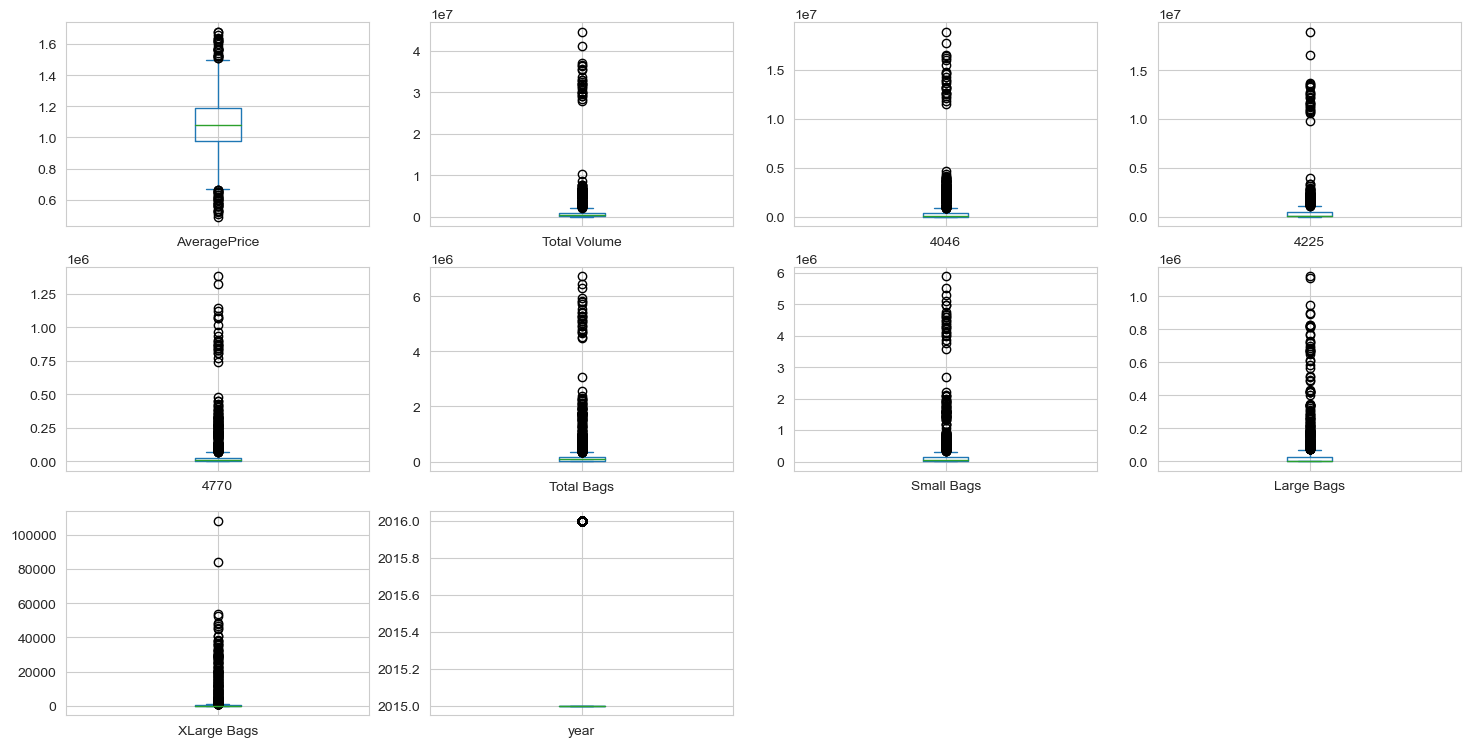

In [129]:
df.plot(kind='box' ,subplots = True,layout=(3,4),figsize = (18,9))

In [130]:
# Checking number of unique values in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
Date,104
AveragePrice,113
Total Volume,1517
4046,1517
4225,1517
4770,1516
Total Bags,1517
Small Bags,1517
Large Bags,1377
XLarge Bags,711


In [131]:
# Categorize the target variable into two classes: 'High Price' and 'Low Price'
df['Price_Classification'] = pd.cut(df['AveragePrice'], bins=[-np.inf, 25, np.inf], labels=['Low Price', 'High Price'])

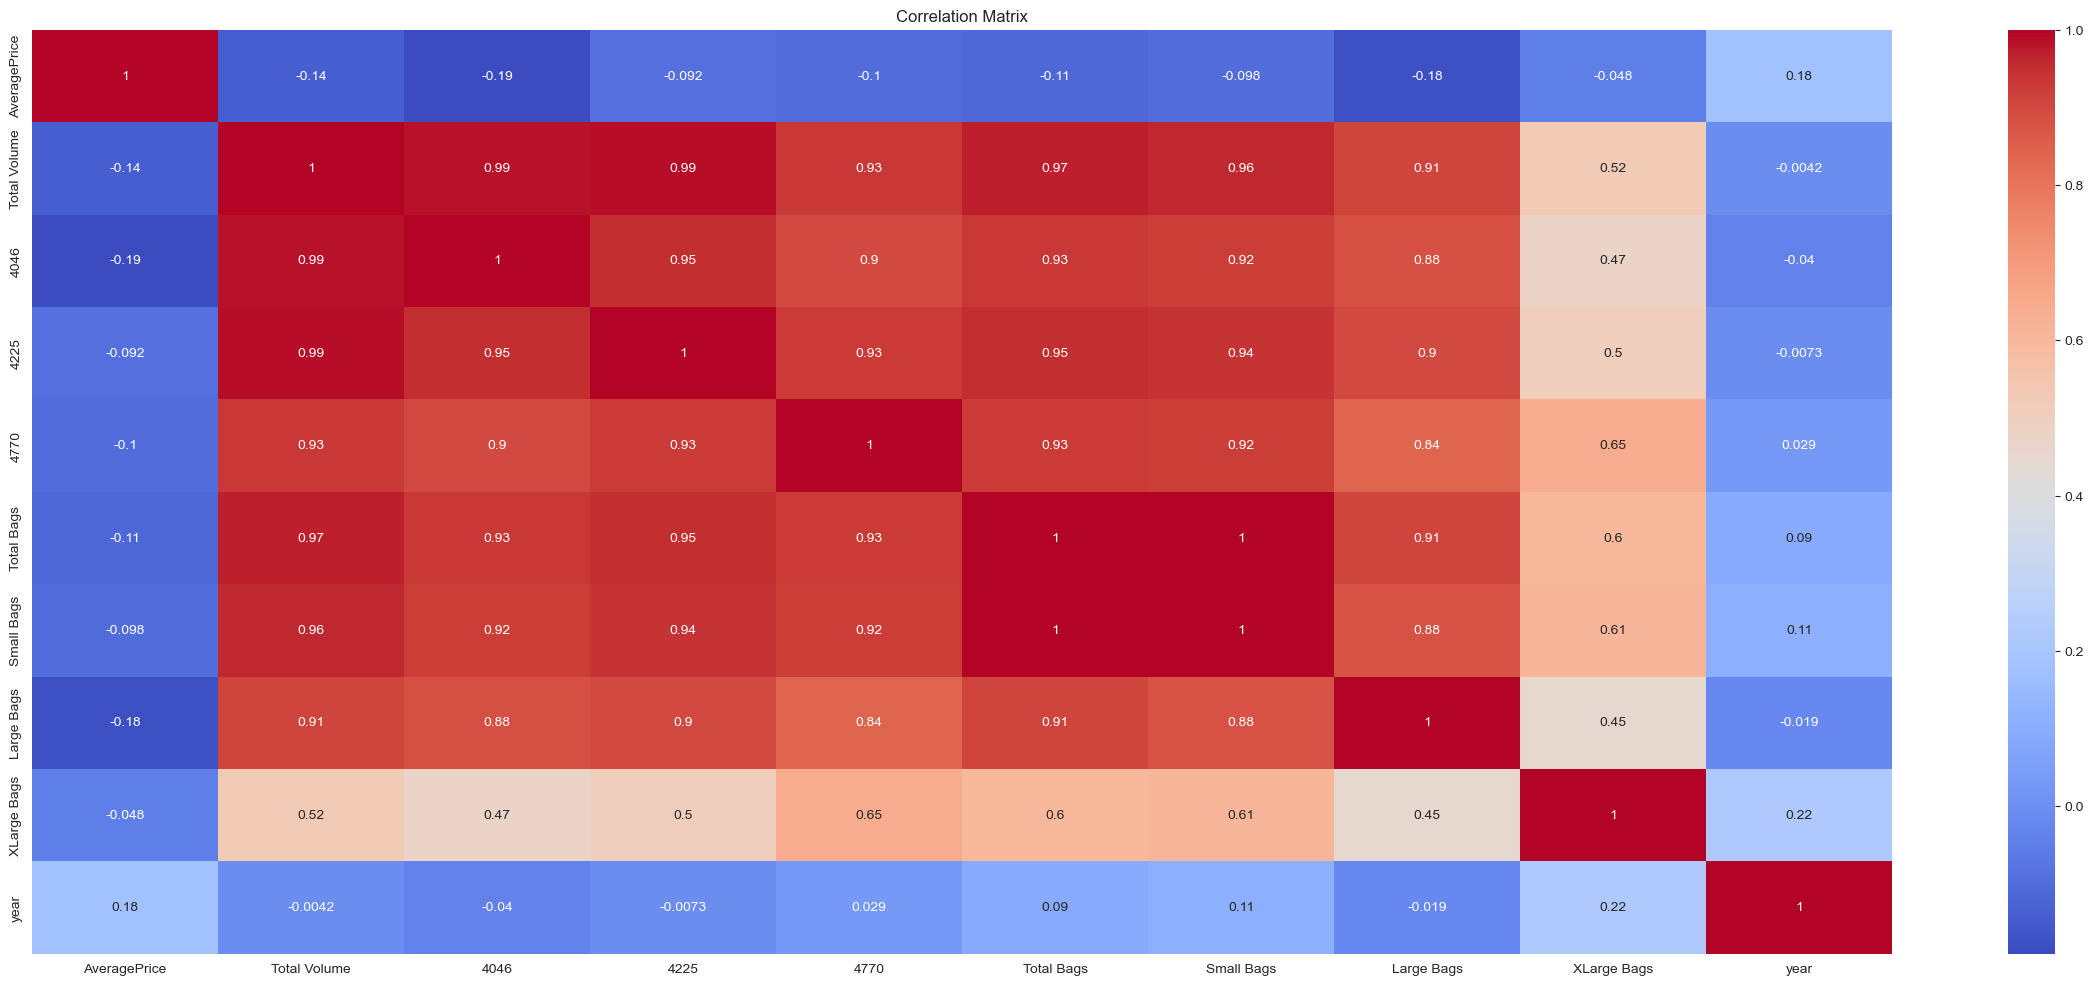

In [132]:
# Correlation matrix to identify potential features
correlation_matrix = df.corr()
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

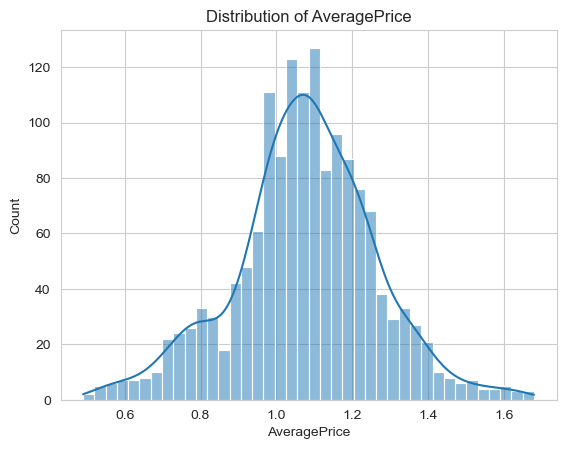

In [133]:
# Visualize the target variable
sns.histplot(df['AveragePrice'], bins=40, kde=True)
plt.title('Distribution of AveragePrice')
plt.show()

In [134]:
df.year.unique()

array([2015., 2016.])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


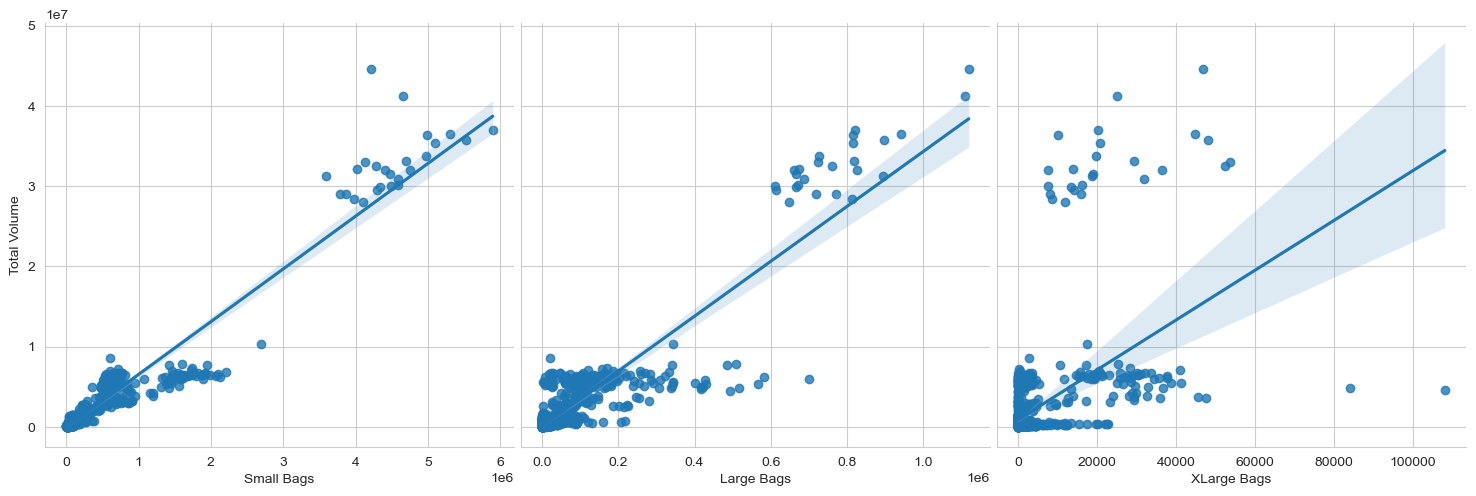

In [135]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


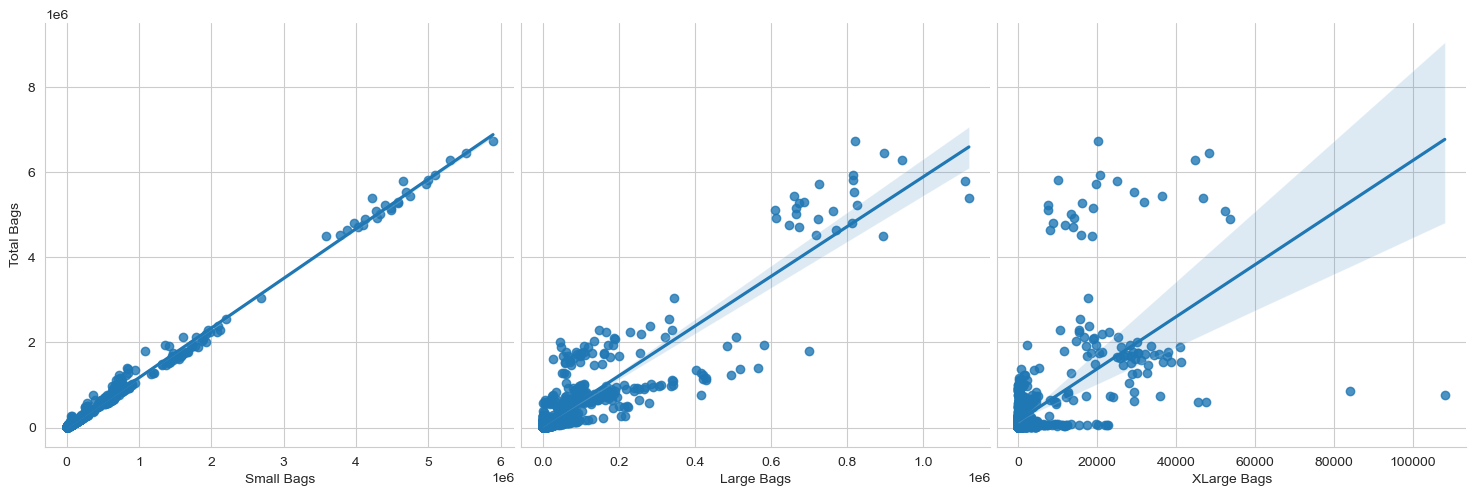

In [136]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

Text(0.5, 1.0, 'yearly Average Price in Each region')

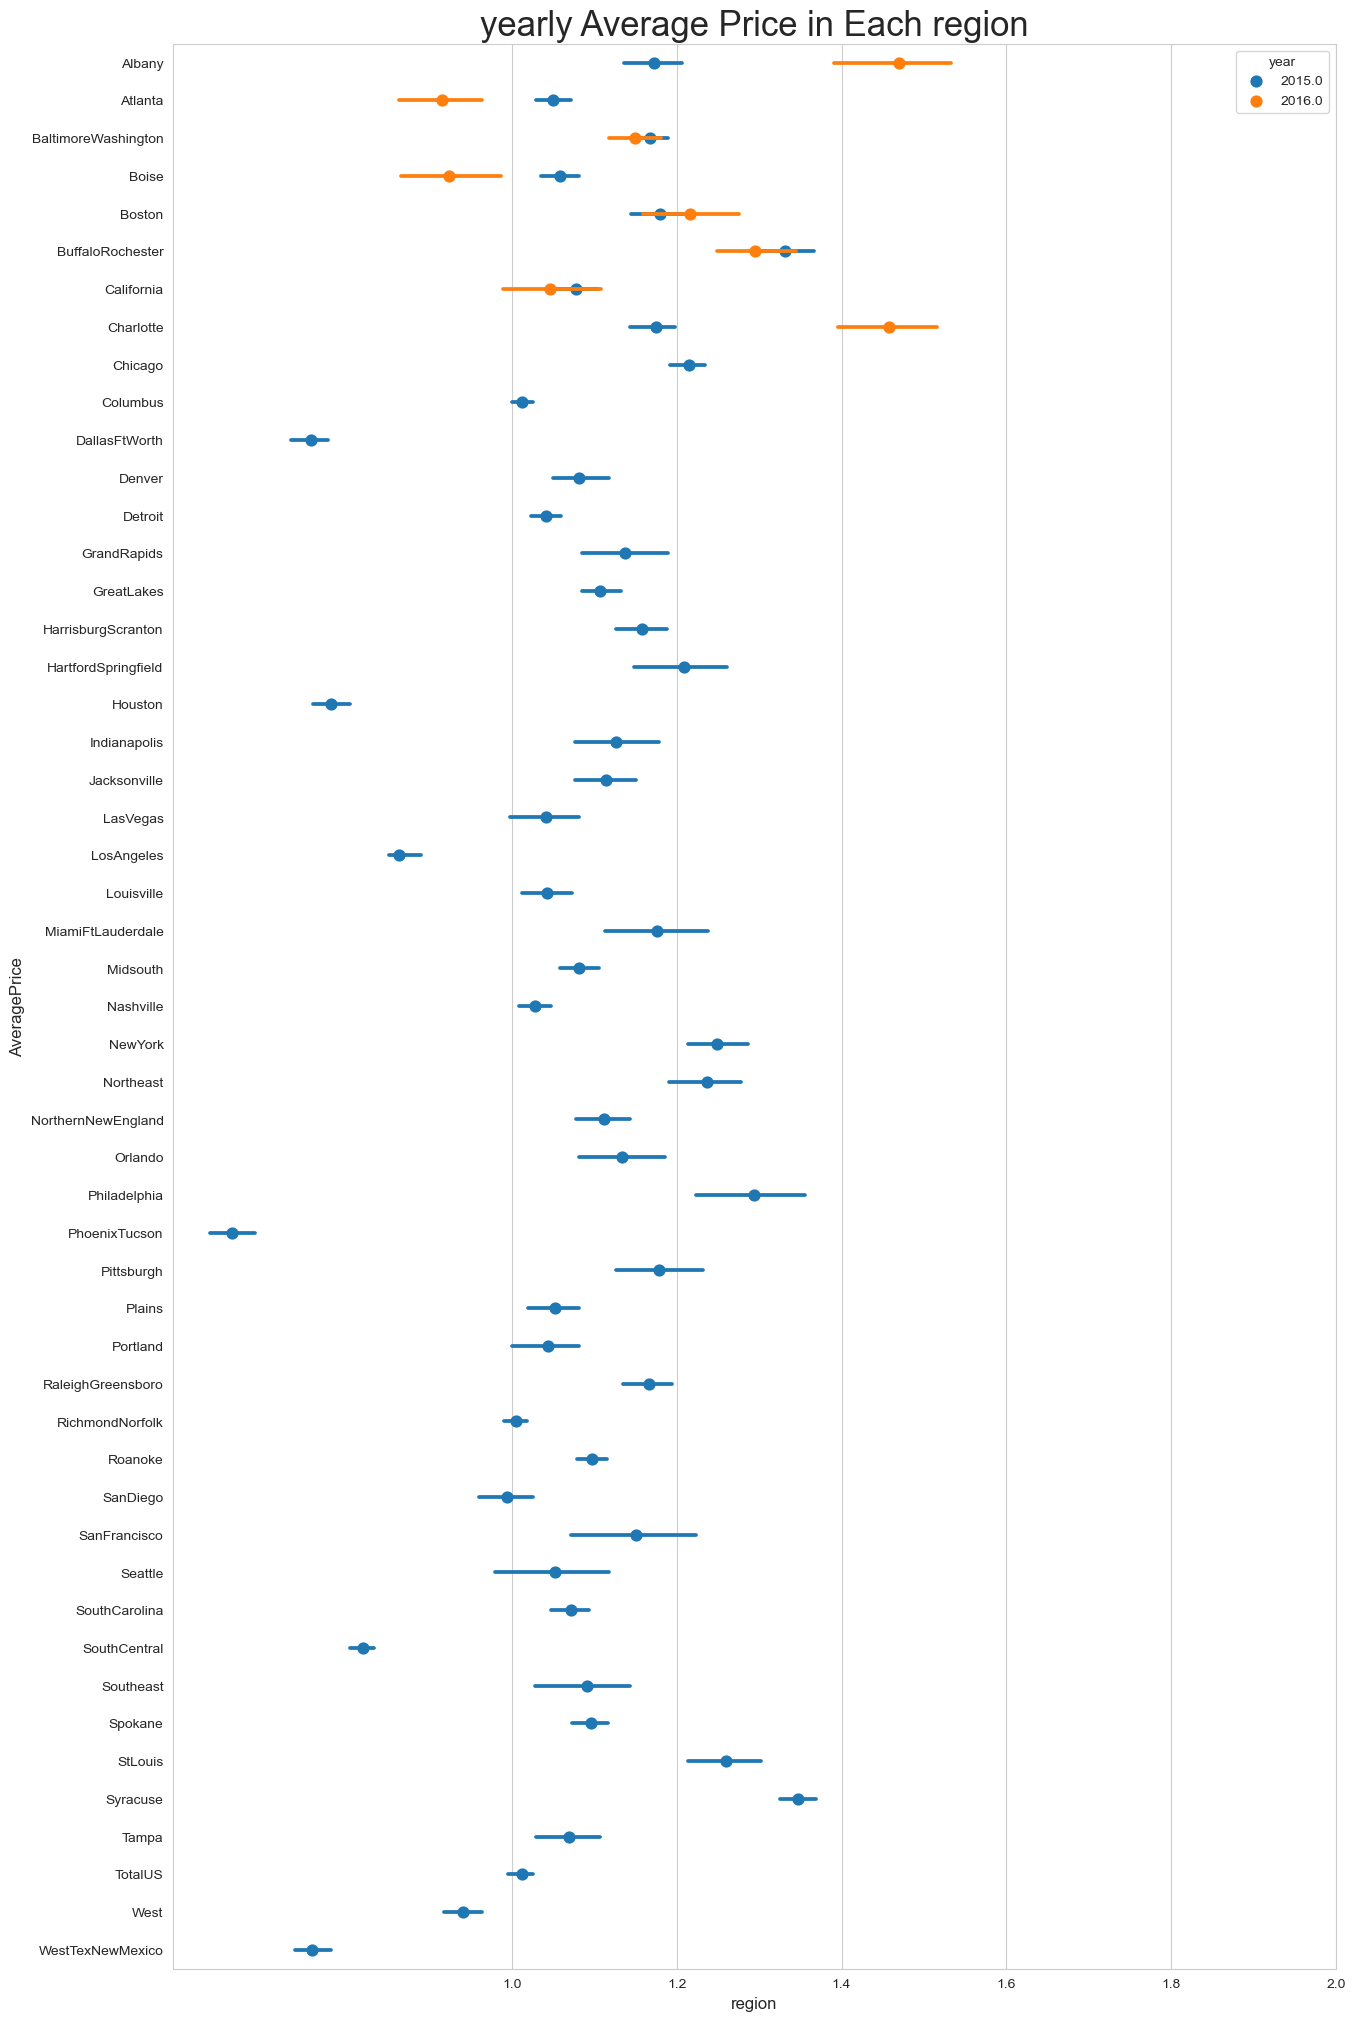

In [138]:
plt.figure(figsize=(15,25))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,6))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("yearly Average Price in Each region",{'fontsize':25})

In [139]:
X=df[['AveragePrice', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']] 
y=df.type 

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (1213, 7)
Y Train Shape  (1213,)
X Test Shape  (304, 7)
Y Test Shape  (304,)


# The Machine Learning Model Training,Evaluation and Predictions

## Random Forest Classifier.

In [141]:
# Classification task using Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [142]:
# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test =  clf.predict(X_test)

In [143]:
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using Random Forest : 1.0


In [152]:
# Classification evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

conventional       1.00      1.00      1.00       304

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304

Confusion Matrix:
 [[304]]


# Linear Regression Model 

In [153]:
# Regression task using Linear Regression
regression_features = ['Total Volume', '4046', '4225', '4770', 'type']
X_reg = df[regression_features]
y_reg = df['AveragePrice']

In [154]:
# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [155]:
numeric_features = X_train_reg.select_dtypes(include=['float64', 'int64']).columns

In [156]:
# Extract the numeric features for standardization
X_train_reg_numeric = X_train_reg[numeric_features]
X_test_reg_numeric = X_test_reg[numeric_features]

In [157]:
# Standardize the numeric features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg_numeric)
X_test_reg_scaled = scaler.transform(X_test_reg_numeric)

In [158]:
# Regression model
reg = LinearRegression()
reg.fit(X_train_reg_scaled, y_train_reg)

LinearRegression()

In [159]:
# Predictions
y_pred_reg = reg.predict(X_test_reg_scaled)

In [160]:
# Regression evaluation
print("\nRegression Metrics:")
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_reg))


Regression Metrics:
Mean Absolute Error: 0.13523663742453332
Mean Squared Error: 0.030777056651864098
R-squared: 0.12297928099322031


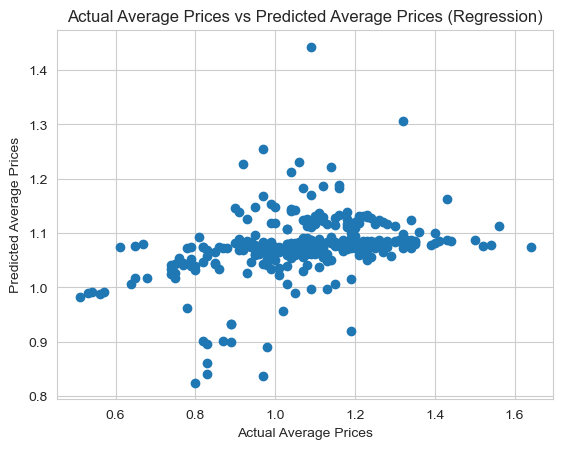

In [161]:
# Visualize the results for regression
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual Average Prices")
plt.ylabel("Predicted Average Prices")
plt.title("Actual Average Prices vs Predicted Average Prices (Regression)")
plt.show()